In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
from collections import Counter
sb.set_style("whitegrid")


In [35]:
trip = pd.read_csv('202104-capitalbikeshare-tripdata.csv') 
#hdf = pd.read_csv('hour.csv', delimiter = ',') 

In [36]:
trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F5C4A81C8792FB5D,electric_bike,2021-04-21 10:38:45,2021-04-21 10:46:59,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.900000,-76.940000,casual
1,4A639A0EE09351C7,electric_bike,2021-04-20 20:28:03,2021-04-20 20:28:27,NaN,NaN,NaN,NaN,38.900000,-77.000000,38.900000,-77.000000,casual
2,3405FD412F059E35,electric_bike,2021-04-20 23:22:32,2021-04-20 23:23:51,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.900000,-76.940000,casual
3,E2B1F0E18AF7811E,electric_bike,2021-04-21 13:00:34,2021-04-21 13:02:27,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.900000,-76.940000,casual
4,59FDBFBE03DA25E7,electric_bike,2021-04-20 10:03:55,2021-04-20 10:11:08,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.890000,-76.940000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216758,C84D318AFEE77E7C,classic_bike,2021-04-17 13:07:49,2021-04-17 13:26:15,New Hampshire Ave & 24th St NW,31275.0,25th St & Pennsylvania Ave NW,31237.0,38.901755,-77.051084,38.903827,-77.053485,casual
216759,6CA6F4009BC6D668,classic_bike,2021-04-03 15:35:32,2021-04-03 17:53:43,Jefferson Dr & 14th St SW,31247.0,25th St & Pennsylvania Ave NW,31237.0,38.888553,-77.032427,38.903827,-77.053485,casual
216760,941642B7BA047303,classic_bike,2021-04-27 17:20:09,2021-04-27 17:56:44,8th & F St NE,31631.0,Georgetown Harbor / 30th St NW,31215.0,38.897274,-76.994749,38.902314,-77.059142,casual
216761,BF443A5C264FD978,classic_bike,2021-04-30 12:16:48,2021-04-30 12:19:42,New Hampshire Ave & 24th St NW,31275.0,25th St & Pennsylvania Ave NW,31237.0,38.901755,-77.051084,38.903827,-77.053485,member


Last week sales report shows lots of registered bike riders complained about non-availability of bikes. I am worried about the fact that 80% of them are found to be working professionals / salaried employees and they are certainly our valued customers. Is there any steps we could take to deal with this problem.

In [336]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216763 entries, 0 to 216762
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             216763 non-null  object 
 1   rideable_type       216763 non-null  object 
 2   started_at          216763 non-null  object 
 3   ended_at            216763 non-null  object 
 4   start_station_name  196404 non-null  object 
 5   start_station_id    196404 non-null  float64
 6   end_station_name    194290 non-null  object 
 7   end_station_id      194290 non-null  float64
 8   start_lat           216763 non-null  float64
 9   start_lng           216763 non-null  float64
 10  end_lat             216401 non-null  float64
 11  end_lng             216401 non-null  float64
 12  member_casual       216763 non-null  object 
dtypes: float64(6), object(7)
memory usage: 21.5+ MB


In [337]:
trip_1 = trip.groupby(["member_casual"])

In [338]:
trip["member_casual"].value_counts() 

member    118024
casual     98739
Name: member_casual, dtype: int64

Member Type – Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)

In [339]:
#trip["ended_at"]= pd.to_numeric(trip["ended_at"])

In [340]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216763 entries, 0 to 216762
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             216763 non-null  object 
 1   rideable_type       216763 non-null  object 
 2   started_at          216763 non-null  object 
 3   ended_at            216763 non-null  object 
 4   start_station_name  196404 non-null  object 
 5   start_station_id    196404 non-null  float64
 6   end_station_name    194290 non-null  object 
 7   end_station_id      194290 non-null  float64
 8   start_lat           216763 non-null  float64
 9   start_lng           216763 non-null  float64
 10  end_lat             216401 non-null  float64
 11  end_lng             216401 non-null  float64
 12  member_casual       216763 non-null  object 
dtypes: float64(6), object(7)
memory usage: 21.5+ MB


In [341]:
trip.shape

(216763, 13)

In [342]:
#trip["ended_at"] = trip["ended_at"].astype(str)

In [343]:
trip["ended_at"]= pd.to_datetime(trip["ended_at"])

In [344]:
trip["started_at"]= pd.to_datetime(trip["started_at"])

In [345]:
#trip["started_at"]= trip["started_at"].astype(str)

In [346]:
trip.sort_values(by = "started_at")

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
21235,B960E303FB66A950,classic_bike,2021-04-01 00:00:42,2021-04-01 00:29:23,Crystal Dr & 27th St S,31009.0,King St Metro North / Cameron St,31098.0,38.848466,-77.051514,38.807040,-77.059817,member
127064,E027F2F137720194,classic_bike,2021-04-01 00:02:08,2021-04-01 00:07:15,15th & L St NW,31276.0,17th & Corcoran St NW,31214.0,38.903649,-77.034918,38.912100,-77.038700,member
60010,7C01B38D02EC78B5,classic_bike,2021-04-01 00:03:43,2021-04-01 00:17:11,Duke St & Strand (Robinson Terminal),31933.0,Duke St & John Carlyle St,31081.0,38.801947,-77.040293,38.804378,-77.060866,casual
51298,4DC44300CCEC3CA7,classic_bike,2021-04-01 00:03:47,2021-04-01 00:12:36,3rd & H St NE,31616.0,13th & D St NE,31622.0,38.900412,-77.001949,38.894832,-76.987633,member
204702,0F2A1828C6E17581,classic_bike,2021-04-01 00:05:18,2021-04-01 00:15:08,Massachusetts Ave & 6th St NE,31657.0,Oklahoma Ave & D St NE,31712.0,38.892934,-76.998273,38.894474,-76.974828,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191907,ADCAD72EB717F58F,classic_bike,2021-04-30 23:58:51,2021-05-01 11:08:29,Thomas Circle,31241.0,Convention Center / 7th & M St NW,31223.0,38.905900,-77.032500,38.905737,-77.022270,member
4811,06753AAFC402CCEC,classic_bike,2021-04-30 23:58:56,2021-04-30 23:59:11,Hamlin & 7th St NE,31514.0,Hamlin & 7th St NE,31514.0,38.927497,-76.997194,38.927497,-76.997194,member
73944,E1AA609FFA3364C5,classic_bike,2021-04-30 23:59:08,2021-05-01 00:07:19,18th & New Hampshire Ave NW,31324.0,11th & O St NW,31286.0,38.911268,-77.041829,38.908430,-77.027140,member
20885,F62E4A39F22DA25E,electric_bike,2021-04-30 23:59:46,2021-05-01 00:06:27,NaN,NaN,10th & U St NW,31111.0,38.920000,-77.040000,38.917231,-77.025858,member


In [351]:
trip ["duration"] = trip ["ended_at"] - trip["started_at"]

In [352]:
trip.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216763 entries, 0 to 216762
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             216763 non-null  object         
 1   rideable_type       216763 non-null  object         
 2   started_at          216763 non-null  datetime64[ns] 
 3   ended_at            216763 non-null  datetime64[ns] 
 4   start_station_name  196404 non-null  object         
 5   start_station_id    196404 non-null  float64        
 6   end_station_name    194290 non-null  object         
 7   end_station_id      194290 non-null  float64        
 8   start_lat           216763 non-null  float64        
 9   start_lng           216763 non-null  float64        
 10  end_lat             216401 non-null  float64        
 11  end_lng             216401 non-null  float64        
 12  member_casual       216763 non-null  object         
 13  duration      

In [353]:
trip.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,F5C4A81C8792FB5D,electric_bike,2021-04-21 10:38:45,2021-04-21 10:46:59,NaN,NaN,NaN,NaN,38.9,-76.94,38.90,-76.94,casual,0 days 00:08:14
1,4A639A0EE09351C7,electric_bike,2021-04-20 20:28:03,2021-04-20 20:28:27,NaN,NaN,NaN,NaN,38.9,-77.00,38.90,-77.00,casual,0 days 00:00:24
2,3405FD412F059E35,electric_bike,2021-04-20 23:22:32,2021-04-20 23:23:51,NaN,NaN,NaN,NaN,38.9,-76.94,38.90,-76.94,casual,0 days 00:01:19
3,E2B1F0E18AF7811E,electric_bike,2021-04-21 13:00:34,2021-04-21 13:02:27,NaN,NaN,NaN,NaN,38.9,-76.94,38.90,-76.94,casual,0 days 00:01:53
4,59FDBFBE03DA25E7,electric_bike,2021-04-20 10:03:55,2021-04-20 10:11:08,NaN,NaN,NaN,NaN,38.9,-76.94,38.89,-76.94,casual,0 days 00:07:13


In [354]:
trip = trip[(trip["duration"] >= "0 days")]

In [428]:
trip['duration'].mean()

Timedelta('0 days 00:29:12.696412423')

In [439]:
trip["duration"].max()

Timedelta('26 days 20:34:45')

In [435]:
trip1 = trip 
trip1.index = trip1.duration

In [436]:
trip1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min
duration,,,,,,,,,,,,,,,
0 days 00:08:14,F5C4A81C8792FB5D,electric_bike,2021-04-21 10:38:45,2021-04-21 10:46:59,NaN,NaN,NaN,NaN,38.9,-76.94,38.90,-76.94,casual,0 days 00:08:14,True
0 days 00:00:24,4A639A0EE09351C7,electric_bike,2021-04-20 20:28:03,2021-04-20 20:28:27,NaN,NaN,NaN,NaN,38.9,-77.00,38.90,-77.00,casual,0 days 00:00:24,True
0 days 00:01:19,3405FD412F059E35,electric_bike,2021-04-20 23:22:32,2021-04-20 23:23:51,NaN,NaN,NaN,NaN,38.9,-76.94,38.90,-76.94,casual,0 days 00:01:19,True
0 days 00:01:53,E2B1F0E18AF7811E,electric_bike,2021-04-21 13:00:34,2021-04-21 13:02:27,NaN,NaN,NaN,NaN,38.9,-76.94,38.90,-76.94,casual,0 days 00:01:53,True
0 days 00:07:13,59FDBFBE03DA25E7,electric_bike,2021-04-20 10:03:55,2021-04-20 10:11:08,NaN,NaN,NaN,NaN,38.9,-76.94,38.89,-76.94,casual,0 days 00:07:13,True


In [355]:
trip_member = trip[(trip["member_casual"] == "member")]

In [356]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216748 entries, 0 to 216762
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             216748 non-null  object         
 1   rideable_type       216748 non-null  object         
 2   started_at          216748 non-null  datetime64[ns] 
 3   ended_at            216748 non-null  datetime64[ns] 
 4   start_station_name  196394 non-null  object         
 5   start_station_id    196394 non-null  float64        
 6   end_station_name    194281 non-null  object         
 7   end_station_id      194281 non-null  float64        
 8   start_lat           216748 non-null  float64        
 9   start_lng           216748 non-null  float64        
 10  end_lat             216386 non-null  float64        
 11  end_lng             216386 non-null  float64        
 12  member_casual       216748 non-null  object         
 13  duration      

In [357]:
trip_member['duration'].mean()

Timedelta('0 days 00:14:53.308705894')

In [360]:
trip_member.sort_values(by = "duration", ascending = True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
180534,AC18E95684BDE5E7,classic_bike,2021-04-25 22:04:18,2021-04-25 22:04:18,Court House Metro / 15th St & N Uhle St,31089.0,NaN,NaN,38.890612,-77.084801,38.8900,-77.0800,member,0 days 00:00:00
185359,86B752295BC1B23B,classic_bike,2021-04-12 10:48:17,2021-04-12 10:48:17,6th St & Indiana Ave NW,31264.0,NaN,NaN,38.894573,-77.019940,38.8900,-77.0200,member,0 days 00:00:00
184730,46682B46457D3368,electric_bike,2021-04-07 17:04:57,2021-04-07 17:04:57,14th & Irving St NW,31124.0,NaN,NaN,38.928661,-77.032206,38.9300,-77.0300,member,0 days 00:00:00
150352,4CA1DB471280FE62,classic_bike,2021-04-05 17:23:18,2021-04-05 17:23:18,1st & N St SE,31209.0,1st & N St SE,31209.0,38.874300,-77.005700,38.8743,-77.0057,member,0 days 00:00:00
213322,A7B4B11B0FE87C6D,electric_bike,2021-04-12 18:29:54,2021-04-12 18:29:54,Metro Center / 12th & G St NW,31230.0,NaN,NaN,38.898325,-77.027792,38.9000,-77.0300,member,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177065,60FDC228D40DE0EF,classic_bike,2021-04-22 21:21:49,2021-04-23 22:21:45,6th & H St NE,31615.0,NaN,NaN,38.899972,-76.998347,NaN,NaN,member,1 days 00:59:56
180584,D7F7F81CBA53D892,classic_bike,2021-04-09 09:34:09,2021-04-10 10:34:05,Minnesota Ave & R St SE,31826.0,NaN,NaN,38.869336,-76.978519,NaN,NaN,member,1 days 00:59:56
184555,919F444E7380B8DF,classic_bike,2021-04-18 16:09:44,2021-04-19 17:09:41,Maine Ave & 9th St SW,31646.0,NaN,NaN,38.880440,-77.025236,38.8800,-77.0100,member,1 days 00:59:57
183043,9ACF1803083AEEA1,classic_bike,2021-04-19 17:25:34,2021-04-20 18:25:31,Kingman Island/The Fields at RFK,31716.0,NaN,NaN,38.895955,-76.967845,38.8800,-76.9900,member,1 days 00:59:57


In [387]:
trip_member["duration"].value_counts()

0 days 00:07:28    154
0 days 00:06:20    151
0 days 00:07:29    151
0 days 00:04:56    147
0 days 00:04:32    147
                  ... 
0 days 01:16:09      1
0 days 03:33:57      1
0 days 00:51:11      1
0 days 16:03:42      1
0 days 10:49:15      1
Name: duration, Length: 4745, dtype: int64

In [362]:
trip_member

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
9,CE6EAC1185FDBF2D,electric_bike,2021-04-21 09:28:34,2021-04-21 09:39:44,NaN,NaN,NaN,NaN,38.890000,-77.000000,38.890000,-76.990000,member,0 days 00:11:10
10,56384DA8CC3785A4,electric_bike,2021-04-25 08:59:30,2021-04-25 09:12:32,NaN,NaN,NaN,NaN,38.890000,-77.000000,38.890000,-77.000000,member,0 days 00:13:02
11,5A94E7373AA71A60,electric_bike,2021-04-25 09:19:32,2021-04-25 09:48:42,NaN,NaN,NaN,NaN,38.890000,-77.000000,38.900000,-77.030000,member,0 days 00:29:10
12,B50C8952D41CD197,electric_bike,2021-04-07 13:37:15,2021-04-07 13:45:55,NaN,NaN,NaN,NaN,38.900000,-77.020000,38.920000,-77.020000,member,0 days 00:08:40
13,C67AD5BC5578F6CE,electric_bike,2021-04-27 12:09:27,2021-04-27 12:28:08,NaN,NaN,NaN,NaN,38.870000,-76.980000,38.890000,-77.000000,member,0 days 00:18:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216753,1E3ACD70B0987881,classic_bike,2021-04-27 19:05:43,2021-04-27 19:49:21,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,Georgetown Harbor / 30th St NW,31215.0,38.888774,-77.028694,38.902314,-77.059142,member,0 days 00:43:38
216754,42E14110AF3F5EDE,electric_bike,2021-04-01 18:52:54,2021-04-01 18:59:51,34th St & Wisconsin Ave NW,31226.0,25th St & Pennsylvania Ave NW,31237.0,38.916453,-77.068237,38.903871,-77.053563,member,0 days 00:06:57
216757,99B2E99CA8D6CEC2,classic_bike,2021-04-04 09:39:41,2021-04-04 09:52:08,Connecticut Ave & R St NW,31299.0,25th St & Pennsylvania Ave NW,31237.0,38.912644,-77.045640,38.903827,-77.053485,member,0 days 00:12:27
216761,BF443A5C264FD978,classic_bike,2021-04-30 12:16:48,2021-04-30 12:19:42,New Hampshire Ave & 24th St NW,31275.0,25th St & Pennsylvania Ave NW,31237.0,38.901755,-77.051084,38.903827,-77.053485,member,0 days 00:02:54


In [363]:
trip_start_stop = trip_member['start_station_name'] == trip_member['end_station_name']

In [364]:
trip_start_stop_1 = trip_start_stop.value_counts()  

In [365]:
pd.DataFrame(trip_start_stop_1).T

,False,True
0,113250,4762


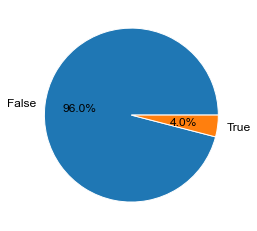

In [366]:
trip_start_stop_1.plot.pie(autopct="%.1f%%");    ## only 4% of the bikes are returning back 
#Using matplotlib

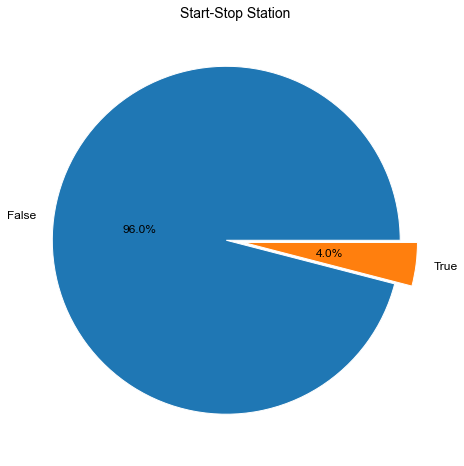

In [367]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[12,8])
labels = trip_start_stop_1.keys()
plt.pie(x=trip_start_stop_1, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Start-Stop Station", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

In [368]:
trip_member_start = trip_member["start_station_name"].value_counts() 
trip_member_start 

New Hampshire Ave & T St NW     1712
15th & P St NW                  1415
14th & Irving St NW             1112
5th & K St NW                   1024
Thomas Circle                   1017
                                ... 
Whiting & Lane Dr                  1
Blueridge Ave & Elkin St           1
Jones Branch & Westbranch Dr       1
Twinbrook Metro                    1
19th & Savannah St SE              1
Name: start_station_name, Length: 599, dtype: int64

In [369]:
trip_member_start = pd.DataFrame(trip_member_start)

In [370]:
trip_member_start ["colors"] = trip_member_start['start_station_name'].apply(lambda x : "Green" if x<= 250 else "Yellow" if x <= 750 else "Orange" if x <= 1000 else "Red")   

In [371]:
trip_member_start.columns= ['value', "colors"]
trip_member_start

,value,colors
New Hampshire Ave & T St NW,1712,Red
15th & P St NW,1415,Red
14th & Irving St NW,1112,Red
5th & K St NW,1024,Red
Thomas Circle,1017,Red
...,...,...
Whiting & Lane Dr,1,Green
Blueridge Ave & Elkin St,1,Green
Jones Branch & Westbranch Dr,1,Green
Twinbrook Metro,1,Green


In [372]:
trip_member_start_1 = trip_member_start ["colors"].value_counts()

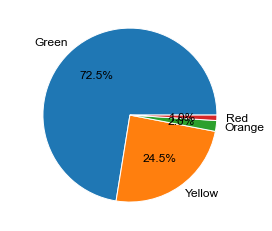

In [373]:
trip_member_start_1.plot.pie(autopct="%.1f%%");
#Using matplotlib

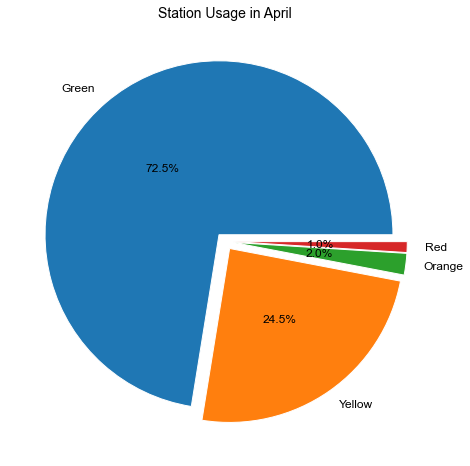

In [374]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[12,8])
labels = trip_member_start_1.keys()
plt.pie(x=trip_member_start_1, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Station Usage in April", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

In [375]:
trip_member_start_orange = trip_member_start[(trip_member_start["colors"] == "Orange")]
trip_member_start_orange

,value,colors
1st & M St NE,982,Orange
17th & Corcoran St NW,945,Orange
14th & V St NW,938,Orange
8th & O St NW,933,Orange
15th & W St NW,905,Orange
3rd & M St NE,839,Orange
Columbus Circle / Union Station,827,Orange
4th & M St SW,822,Orange
Columbia & Ontario Rd NW,792,Orange
14th & R St NW,772,Orange


In [376]:
trip_member_start_red = trip_member_start[(trip_member_start["colors"] == "Red")]
trip_member_start_red

,value,colors
New Hampshire Ave & T St NW,1712,Red
15th & P St NW,1415,Red
14th & Irving St NW,1112,Red
5th & K St NW,1024,Red
Thomas Circle,1017,Red
11th & M St NW,1011,Red


In [377]:
#trip_member_start_red_orange = pd.merge(trip_member_start_orange, trip_member_start_red)  #, on = ['User_ID'

In [378]:
trip_member_start_red_orange = pd.concat((trip_member_start_orange ,trip_member_start_red)) 
trip_member_start_red_orange 

,value,colors
1st & M St NE,982,Orange
17th & Corcoran St NW,945,Orange
14th & V St NW,938,Orange
8th & O St NW,933,Orange
15th & W St NW,905,Orange
3rd & M St NE,839,Orange
Columbus Circle / Union Station,827,Orange
4th & M St SW,822,Orange
Columbia & Ontario Rd NW,792,Orange
14th & R St NW,772,Orange


array([<AxesSubplot:title={'center':'value'}>], dtype=object)

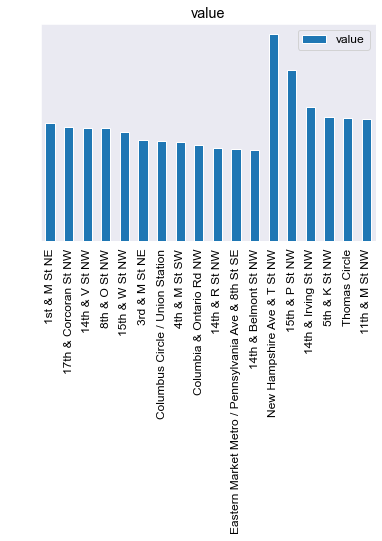

In [379]:
trip_member_start_red_orange.plot(kind = 'bar',  subplots = True)

In [380]:
trip_member_start_red_orange.reset_index(inplace=True)
trip_member_start_red_orange = trip_member_start_red_orange.rename(columns = {'index':'stations'})
trip_member_start_red_orange

,stations,value,colors
0,1st & M St NE,982,Orange
1,17th & Corcoran St NW,945,Orange
2,14th & V St NW,938,Orange
3,8th & O St NW,933,Orange
4,15th & W St NW,905,Orange
5,3rd & M St NE,839,Orange
6,Columbus Circle / Union Station,827,Orange
7,4th & M St SW,822,Orange
8,Columbia & Ontario Rd NW,792,Orange
9,14th & R St NW,772,Orange


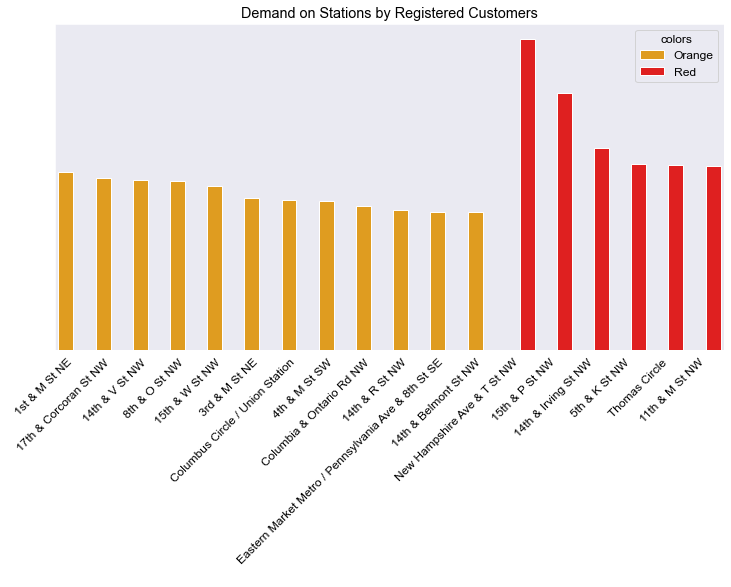

<Figure size 576x432 with 0 Axes>

In [381]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sb.barplot(x="stations", y="value", data=trip_member_start_red_orange, hue = "colors",ax=ax, palette=["Orange", "Red"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
  
# This will add label to the X-axis
ax.set_xlabel( "Stations", size = 12) 
  
# This will add label to the Y-axis
ax.set_ylabel( "value", size = 12) 
  
# This will add title to the plot
ax.set_title( "Demand on Stations by Registered Customers") 
plt.show();

New Hampshire Ave & T St NW

In [382]:
trip_member_start_station = trip_member[(trip_member["start_station_name"] == "New Hampshire Ave & T St NW")]

In [383]:
trip_member_start_station

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
3701,5D8CF844DE90DA39,classic_bike,2021-04-23 23:25:12,2021-04-23 23:30:27,New Hampshire Ave & T St NW,31229.0,11th & S St NW,31280.0,38.915544,-77.038252,38.913761,-77.027025,member,0 days 00:05:15
4250,EA37555A536FA0B3,classic_bike,2021-04-08 17:28:55,2021-04-08 17:40:25,New Hampshire Ave & T St NW,31229.0,Lincoln Rd & Seaton Pl NE/Harry Thomas Rec Center,31523.0,38.915544,-77.038252,38.915000,-77.007800,member,0 days 00:11:30
4421,7DD7DA1AB4EFFB20,electric_bike,2021-04-26 13:25:25,2021-04-26 13:28:51,New Hampshire Ave & T St NW,31229.0,15th & W St NW,31125.0,38.915601,-77.038144,38.919062,-77.034431,member,0 days 00:03:26
4671,0093E8F047D88513,classic_bike,2021-04-10 05:57:12,2021-04-10 06:04:40,New Hampshire Ave & T St NW,31229.0,17th & G St NW,31277.0,38.915544,-77.038252,38.898283,-77.039732,member,0 days 00:07:28
5237,E3B7562ED36F28D4,classic_bike,2021-04-08 19:36:45,2021-04-08 19:45:53,New Hampshire Ave & T St NW,31229.0,10th & Florida Ave NW,31120.0,38.915544,-77.038252,38.920387,-77.025672,member,0 days 00:09:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208969,0E487EC949B990F2,electric_bike,2021-04-17 18:46:43,2021-04-17 18:58:53,New Hampshire Ave & T St NW,31229.0,5th St & Massachusetts Ave NW,31265.0,38.915574,-77.038202,38.901056,-77.019033,member,0 days 00:12:10
208973,0044108CB5FA26F2,electric_bike,2021-04-15 20:39:00,2021-04-15 21:10:57,New Hampshire Ave & T St NW,31229.0,NaN,NaN,38.915563,-77.038176,38.920000,-77.040000,member,0 days 00:31:57
208974,E4BF8A05509B6345,electric_bike,2021-04-18 09:19:00,2021-04-18 09:23:10,New Hampshire Ave & T St NW,31229.0,NaN,NaN,38.915572,-77.038303,38.910000,-77.050000,member,0 days 00:04:10
214767,CD38E27F45082AAC,classic_bike,2021-04-07 15:15:33,2021-04-07 16:02:45,New Hampshire Ave & T St NW,31229.0,Connecticut Ave & Yuma St NW,31318.0,38.915544,-77.038252,38.947156,-77.065115,member,0 days 00:47:12


In [384]:
trip_member_end_station = trip_member[(trip_member["end_station_name"] == "New Hampshire Ave & T St NW")]
trip_member_end_station

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
3350,2A9A25468EB19F21,classic_bike,2021-04-19 17:45:37,2021-04-19 18:07:38,Rhode Island & Montana Ave NE,31526.0,New Hampshire Ave & T St NW,31229.0,38.924300,-76.985900,38.915544,-77.038252,member,0 days 00:22:01
6335,F6E503A2C5E2F931,classic_bike,2021-04-08 16:29:26,2021-04-08 16:38:56,19th & K St NW,31253.0,New Hampshire Ave & T St NW,31229.0,38.902204,-77.043370,38.915544,-77.038252,member,0 days 00:09:30
6336,3DE62DB3C64465E3,classic_bike,2021-04-10 13:19:57,2021-04-10 13:23:31,Adams Mill & Columbia Rd NW,31104.0,New Hampshire Ave & T St NW,31229.0,38.922925,-77.042581,38.915544,-77.038252,member,0 days 00:03:34
6337,209DF7E4ECA1729C,classic_bike,2021-04-26 17:35:09,2021-04-26 17:53:14,1st & M St NE,31603.0,New Hampshire Ave & T St NW,31229.0,38.905697,-77.005483,38.915544,-77.038252,member,0 days 00:18:05
6338,98F0DE1EBD188F27,classic_bike,2021-04-23 12:37:33,2021-04-23 12:47:02,Woodley Park Metro / Calvert St & Connecticut ...,31323.0,New Hampshire Ave & T St NW,31229.0,38.923389,-77.051833,38.915544,-77.038252,member,0 days 00:09:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199600,2A59801D157BC33B,classic_bike,2021-04-07 15:47:54,2021-04-07 16:00:08,34th St & Wisconsin Ave NW,31226.0,New Hampshire Ave & T St NW,31229.0,38.916442,-77.068200,38.915544,-77.038252,member,0 days 00:12:14
199601,343A31A632DE3AC4,classic_bike,2021-04-16 14:38:05,2021-04-16 14:52:00,34th St & Wisconsin Ave NW,31226.0,New Hampshire Ave & T St NW,31229.0,38.916442,-77.068200,38.915544,-77.038252,member,0 days 00:13:55
199606,8F5F5F3049007EE0,classic_bike,2021-04-05 14:27:40,2021-04-05 14:44:49,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,New Hampshire Ave & T St NW,31229.0,38.888774,-77.028694,38.915544,-77.038252,member,0 days 00:17:09
199870,88878E8716179FB8,classic_bike,2021-04-05 14:59:26,2021-04-05 15:10:36,34th St & Wisconsin Ave NW,31226.0,New Hampshire Ave & T St NW,31229.0,38.916442,-77.068200,38.915544,-77.038252,member,0 days 00:11:10


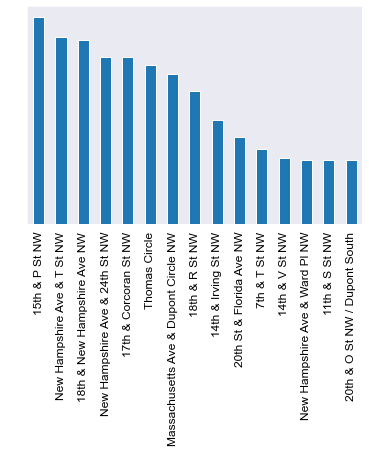

In [385]:
trip_member_end_station_day = trip_member_end_station ["start_station_name"].value_counts().head(15).plot(kind="bar")

In [150]:
trip_member_end_station_day

<AxesSubplot:>

---------------------------------------------------------------------------------------------------------------

##### Also, I do not want to get such complaints from Casual Users. Hence, how could analytics team help me in preventing this happening to Casual Users.

In [388]:
trip_casual= trip[(trip["member_casual"] == "casual")]

In [389]:
pd.DataFrame(trip_casual)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,F5C4A81C8792FB5D,electric_bike,2021-04-21 10:38:45,2021-04-21 10:46:59,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.900000,-76.940000,casual,0 days 00:08:14
1,4A639A0EE09351C7,electric_bike,2021-04-20 20:28:03,2021-04-20 20:28:27,NaN,NaN,NaN,NaN,38.900000,-77.000000,38.900000,-77.000000,casual,0 days 00:00:24
2,3405FD412F059E35,electric_bike,2021-04-20 23:22:32,2021-04-20 23:23:51,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.900000,-76.940000,casual,0 days 00:01:19
3,E2B1F0E18AF7811E,electric_bike,2021-04-21 13:00:34,2021-04-21 13:02:27,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.900000,-76.940000,casual,0 days 00:01:53
4,59FDBFBE03DA25E7,electric_bike,2021-04-20 10:03:55,2021-04-20 10:11:08,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.890000,-76.940000,casual,0 days 00:07:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216755,7425A7629E36FBDC,docked_bike,2021-04-19 22:35:02,2021-04-19 22:43:11,17th & Corcoran St NW,31214.0,25th St & Pennsylvania Ave NW,31237.0,38.912100,-77.038700,38.903827,-77.053485,casual,0 days 00:08:09
216756,5EAA16B766DC2BB5,classic_bike,2021-04-03 11:06:25,2021-04-03 11:11:45,18th & M St NW,31221.0,25th St & Pennsylvania Ave NW,31237.0,38.905067,-77.041779,38.903827,-77.053485,casual,0 days 00:05:20
216758,C84D318AFEE77E7C,classic_bike,2021-04-17 13:07:49,2021-04-17 13:26:15,New Hampshire Ave & 24th St NW,31275.0,25th St & Pennsylvania Ave NW,31237.0,38.901755,-77.051084,38.903827,-77.053485,casual,0 days 00:18:26
216759,6CA6F4009BC6D668,classic_bike,2021-04-03 15:35:32,2021-04-03 17:53:43,Jefferson Dr & 14th St SW,31247.0,25th St & Pennsylvania Ave NW,31237.0,38.888553,-77.032427,38.903827,-77.053485,casual,0 days 02:18:11


In [390]:
trip_casual ["member_casual"].value_counts

<bound method IndexOpsMixin.value_counts of 0         casual
1         casual
2         casual
3         casual
4         casual
           ...  
216755    casual
216756    casual
216758    casual
216759    casual
216760    casual
Name: member_casual, Length: 98736, dtype: object>

In [391]:
trip_start_stop_casual = trip_casual['start_station_name'] == trip_casual['end_station_name']

In [392]:
trip_start_stop_casual 

0         False
1         False
2         False
3         False
4         False
          ...  
216755    False
216756    False
216758    False
216759    False
216760    False
Length: 98736, dtype: bool

In [393]:
trip_start_stop_casual = pd.DataFrame(trip_start_stop_casual)


In [394]:
trip_start_stop_casual.columns= ["approval"]
trip_start_stop_casual

,approval
0,False
1,False
2,False
3,False
4,False
...,...
216755,False
216756,False
216758,False
216759,False


In [395]:
f_column = trip_start_stop_casual["approval"]
trip_casual= pd.concat([trip_casual,f_column], axis = 1)
trip_casual

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,approval
0,F5C4A81C8792FB5D,electric_bike,2021-04-21 10:38:45,2021-04-21 10:46:59,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.900000,-76.940000,casual,0 days 00:08:14,False
1,4A639A0EE09351C7,electric_bike,2021-04-20 20:28:03,2021-04-20 20:28:27,NaN,NaN,NaN,NaN,38.900000,-77.000000,38.900000,-77.000000,casual,0 days 00:00:24,False
2,3405FD412F059E35,electric_bike,2021-04-20 23:22:32,2021-04-20 23:23:51,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.900000,-76.940000,casual,0 days 00:01:19,False
3,E2B1F0E18AF7811E,electric_bike,2021-04-21 13:00:34,2021-04-21 13:02:27,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.900000,-76.940000,casual,0 days 00:01:53,False
4,59FDBFBE03DA25E7,electric_bike,2021-04-20 10:03:55,2021-04-20 10:11:08,NaN,NaN,NaN,NaN,38.900000,-76.940000,38.890000,-76.940000,casual,0 days 00:07:13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216755,7425A7629E36FBDC,docked_bike,2021-04-19 22:35:02,2021-04-19 22:43:11,17th & Corcoran St NW,31214.0,25th St & Pennsylvania Ave NW,31237.0,38.912100,-77.038700,38.903827,-77.053485,casual,0 days 00:08:09,False
216756,5EAA16B766DC2BB5,classic_bike,2021-04-03 11:06:25,2021-04-03 11:11:45,18th & M St NW,31221.0,25th St & Pennsylvania Ave NW,31237.0,38.905067,-77.041779,38.903827,-77.053485,casual,0 days 00:05:20,False
216758,C84D318AFEE77E7C,classic_bike,2021-04-17 13:07:49,2021-04-17 13:26:15,New Hampshire Ave & 24th St NW,31275.0,25th St & Pennsylvania Ave NW,31237.0,38.901755,-77.051084,38.903827,-77.053485,casual,0 days 00:18:26,False
216759,6CA6F4009BC6D668,classic_bike,2021-04-03 15:35:32,2021-04-03 17:53:43,Jefferson Dr & 14th St SW,31247.0,25th St & Pennsylvania Ave NW,31237.0,38.888553,-77.032427,38.903827,-77.053485,casual,0 days 02:18:11,False


In [399]:
trip_start_stop_casual_1 = trip_start_stop_casual.value_counts()  

In [400]:
pd.DataFrame(trip_start_stop_casual_1).T

approval,False,True
0,85187,13549


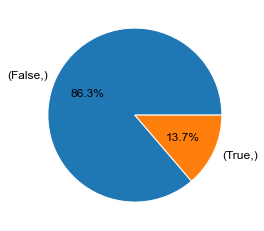

In [401]:
trip_start_stop_casual_1.plot.pie(autopct="%.1f%%");   

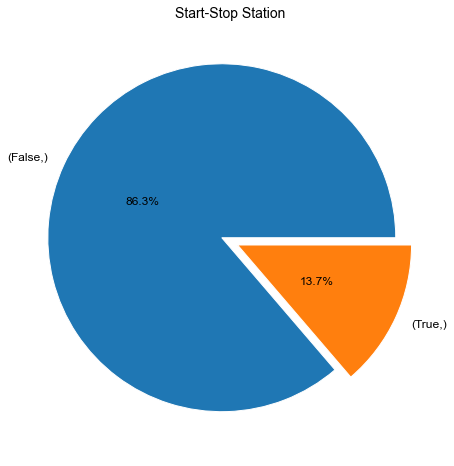

In [402]:
pie, ax = plt.subplots(figsize=[12,8])
labels = trip_start_stop_casual_1.keys()
plt.pie(x=trip_start_stop_casual_1, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Start-Stop Station", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

In [403]:
trip_casual_start = trip_casual["start_station_name"].value_counts() 

In [404]:
trip_casual_start

Lincoln Memorial                               2486
Jefferson Dr & 14th St SW                      1951
Henry Bacon Dr & Lincoln Memorial Circle NW    1770
17th St & Independence Ave SW                  1741
4th St & Madison Dr NW                         1700
                                               ... 
Frederick Ave & Horners Ln                        1
37th & Ely Pl SE                                  1
Ridge Rd Community Center                         1
Shady Grove Hospital                              1
Town Center Pkwy & Sunset Hills Rd                1
Name: start_station_name, Length: 627, dtype: int64

In [405]:
trip_casual_start = pd.DataFrame(trip_casual_start)

In [406]:
trip_casual_start ["colors"] = trip_casual_start['start_station_name'].apply(lambda x : "Green" if x<= 250 else "Yellow" if x <= 750 else "Orange" if x <= 1000 else "Red")   

In [407]:
trip_casual_start.columns= ['value', "colors"]
trip_casual_start

,value,colors
Lincoln Memorial,2486,Red
Jefferson Dr & 14th St SW,1951,Red
Henry Bacon Dr & Lincoln Memorial Circle NW,1770,Red
17th St & Independence Ave SW,1741,Red
4th St & Madison Dr NW,1700,Red
...,...,...
Frederick Ave & Horners Ln,1,Green
37th & Ely Pl SE,1,Green
Ridge Rd Community Center,1,Green
Shady Grove Hospital,1,Green


In [408]:
trip_casual_start_1 = trip_casual_start ["colors"].value_counts()

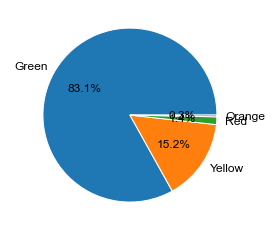

In [409]:
trip_casual_start_1.plot.pie(autopct="%.1f%%");
#Using matplotlib

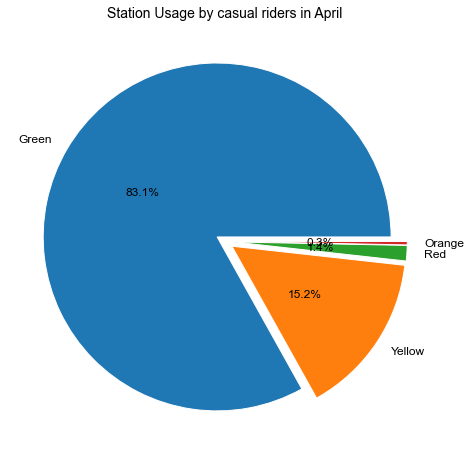

In [410]:
pie, ax = plt.subplots(figsize=[12,8])
labels = trip_casual_start_1.keys()
plt.pie(x=trip_casual_start_1, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Station Usage by casual riders in April", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

In [411]:
trip_casual_start_orange = trip_casual_start[(trip_casual_start["colors"] == "Orange")]
trip_casual_start_orange

,value,colors
Gravelly Point,831,Orange
Maine Ave & 9th St SW,788,Orange


In [412]:
trip_casual_start_red = trip_casual_start[(trip_casual_start["colors"] == "Red")]
trip_casual_start_red

,value,colors
Lincoln Memorial,2486,Red
Jefferson Dr & 14th St SW,1951,Red
Henry Bacon Dr & Lincoln Memorial Circle NW,1770,Red
17th St & Independence Ave SW,1741,Red
4th St & Madison Dr NW,1700,Red
Smithsonian-National Mall / Jefferson Dr & 12th St SW,1608,Red
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,1479,Red
Jefferson Memorial,1383,Red
15th St & Constitution Ave NW,1074,Red


In [413]:
trip_casual_start_red_orange = pd.concat((trip_casual_start_orange ,trip_casual_start_red)) 
trip_casual_start_red_orange 

,value,colors
Gravelly Point,831,Orange
Maine Ave & 9th St SW,788,Orange
Lincoln Memorial,2486,Red
Jefferson Dr & 14th St SW,1951,Red
Henry Bacon Dr & Lincoln Memorial Circle NW,1770,Red
17th St & Independence Ave SW,1741,Red
4th St & Madison Dr NW,1700,Red
Smithsonian-National Mall / Jefferson Dr & 12th St SW,1608,Red
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,1479,Red
Jefferson Memorial,1383,Red


array([<AxesSubplot:title={'center':'value'}>], dtype=object)

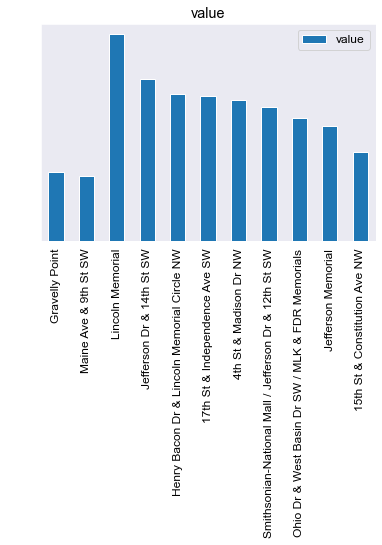

In [414]:
trip_casual_start_red_orange.plot(kind = 'bar',  subplots = True)

In [415]:
trip_casual_start_red_orange.reset_index(inplace=True)
trip_casual_start_red_orange = trip_casual_start_red_orange.rename(columns = {'index':'stations'})
trip_casual_start_red_orange

,stations,value,colors
0,Gravelly Point,831,Orange
1,Maine Ave & 9th St SW,788,Orange
2,Lincoln Memorial,2486,Red
3,Jefferson Dr & 14th St SW,1951,Red
4,Henry Bacon Dr & Lincoln Memorial Circle NW,1770,Red
5,17th St & Independence Ave SW,1741,Red
6,4th St & Madison Dr NW,1700,Red
7,Smithsonian-National Mall / Jefferson Dr & 12t...,1608,Red
8,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,1479,Red
9,Jefferson Memorial,1383,Red


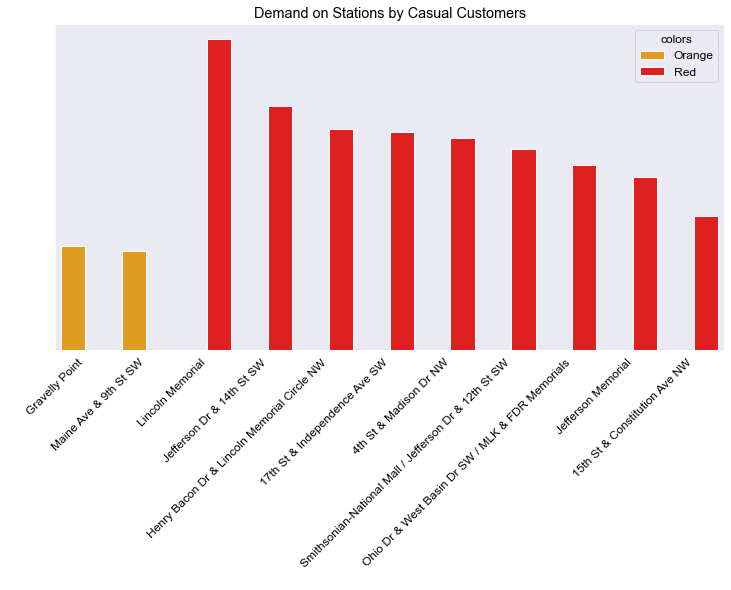

<Figure size 576x432 with 0 Axes>

In [427]:
fig, ax = plt.subplots(figsize=(12, 6))
#plt.figure(figsize=(8, 6))
sb.barplot(x="stations", y="value", data=trip_casual_start_red_orange, hue = "colors",ax=ax, palette=["Orange", "Red"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
  
# This will add label to the X-axis
ax.set_xlabel( "Stations", size = 12) 
  
# This will add label to the Y-axis
ax.set_ylabel( "value", size = 12) 
  
# This will add title to the plot
ax.set_title( "Demand on Stations by Casual Customers") 
plt.show();

Lincoln 

In [417]:
trip_casual_1 = trip_casual[(trip_casual["start_station_name"]) == "Lincoln Memorial"]
trip_casual_1["approval"].value_counts()

False    2135
True      351
Name: approval, dtype: int64

In [418]:
trip_casual_1 = trip_casual[(trip_casual["start_station_name"]) == "Jefferson Dr & 14th St SW"]
trip_casual_1["approval"].value_counts()

False    1504
True      447
Name: approval, dtype: int64

In [419]:
trip_casual['duration'].mean()

Timedelta('0 days 00:46:19.860385269')

Lincoln Memorial

In [420]:
trip_casual_start_station = trip_casual[(trip_casual["start_station_name"] == "Lincoln Memorial")]

In [421]:
trip_casual_start_station

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,approval
3342,9391850B0FE35FF8,classic_bike,2021-04-08 15:30:15,2021-04-08 15:49:59,Lincoln Memorial,31258.0,Eads St & 12th St S,31071.0,38.888255,-77.049436,38.862753,-77.054280,casual,0 days 00:19:44,False
7192,C191E30F93D10171,classic_bike,2021-04-03 14:54:07,2021-04-03 15:34:24,Lincoln Memorial,31258.0,19th & E Street NW,31206.0,38.888255,-77.049436,38.895200,-77.043600,casual,0 days 00:40:17,False
7193,C9A58B1A097427CC,classic_bike,2021-04-03 14:49:19,2021-04-03 15:34:10,Lincoln Memorial,31258.0,19th & E Street NW,31206.0,38.888255,-77.049436,38.895200,-77.043600,casual,0 days 00:44:51,False
8969,147BE6FFE142F4CC,docked_bike,2021-04-10 16:50:51,2021-04-10 17:20:03,Lincoln Memorial,31258.0,National Airport,31935.0,38.888255,-77.049437,38.852903,-77.045916,casual,0 days 00:29:12,False
9906,CB52A04BA56836A0,docked_bike,2021-04-20 14:31:13,2021-04-23 21:34:23,Lincoln Memorial,31258.0,6035 Warehouse,32901.0,38.888255,-77.049437,38.963810,-77.010266,casual,3 days 07:03:10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215846,8A9F5A7124A6182C,classic_bike,2021-04-04 20:36:03,2021-04-04 21:03:22,Lincoln Memorial,31258.0,C & O Canal & Wisconsin Ave NW,31225.0,38.888255,-77.049436,38.903750,-77.062690,casual,0 days 00:27:19,False
215847,92C473080634BD04,classic_bike,2021-04-04 11:11:38,2021-04-04 11:26:53,Lincoln Memorial,31258.0,C & O Canal & Wisconsin Ave NW,31225.0,38.888255,-77.049436,38.903750,-77.062690,casual,0 days 00:15:15,False
215848,6FEF82E3A0A4A482,classic_bike,2021-04-24 14:13:52,2021-04-24 14:31:24,Lincoln Memorial,31258.0,C & O Canal & Wisconsin Ave NW,31225.0,38.888255,-77.049436,38.903750,-77.062690,casual,0 days 00:17:32,False
215958,6906E7EA826680FF,docked_bike,2021-04-24 11:34:05,2021-04-24 12:09:57,Lincoln Memorial,31258.0,C & O Canal & Wisconsin Ave NW,31225.0,38.888255,-77.049437,38.903750,-77.062690,casual,0 days 00:35:52,False


In [422]:
trip_casual_end_station = trip_casual[(trip_casual["end_station_name"] == "Lincoln Memorial")]
trip_casual_end_station

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,approval
141381,91C373A1CA739D13,docked_bike,2021-04-03 16:00:20,2021-04-03 16:23:19,Fern St & Army Navy Dr,31936.0,Lincoln Memorial,31258.0,38.864838,-77.056873,38.888255,-77.049437,casual,0 days 00:22:59,False
141385,308E2071D85E9A2C,docked_bike,2021-04-10 12:15:00,2021-04-10 12:38:54,10th St & Constitution Ave NW,31219.0,Lincoln Memorial,31258.0,38.893028,-77.026013,38.888255,-77.049437,casual,0 days 00:23:54,False
141389,CB6933C2E442B474,classic_bike,2021-04-11 09:34:17,2021-04-11 11:01:21,5th St & Massachusetts Ave NW,31265.0,Lincoln Memorial,31258.0,38.900930,-77.018677,38.888255,-77.049436,casual,0 days 01:27:04,False
141402,B821C4EBDC7100C3,electric_bike,2021-04-07 15:21:32,2021-04-07 15:45:40,5th St & Massachusetts Ave NW,31265.0,Lincoln Memorial,31258.0,38.900920,-77.018614,38.888238,-77.049459,casual,0 days 00:24:08,False
141407,46F295FFE565C798,docked_bike,2021-04-24 11:45:10,2021-04-24 12:02:14,L'Enfant Plaza / 7th & C St SW,31218.0,Lincoln Memorial,31258.0,38.886266,-77.022241,38.888255,-77.049437,casual,0 days 00:17:04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203532,21CD0712B60C682B,classic_bike,2021-04-03 17:29:26,2021-04-03 18:29:09,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,Lincoln Memorial,31258.0,38.888774,-77.028694,38.888255,-77.049436,casual,0 days 00:59:43,False
203534,6227D6B8301C9112,classic_bike,2021-04-03 14:42:43,2021-04-03 15:41:27,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,Lincoln Memorial,31258.0,38.888774,-77.028694,38.888255,-77.049436,casual,0 days 00:58:44,False
203536,945A85DC86469560,classic_bike,2021-04-03 14:40:59,2021-04-03 15:41:02,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,Lincoln Memorial,31258.0,38.888774,-77.028694,38.888255,-77.049436,casual,0 days 01:00:03,False
203537,641D8CDBE05424A8,classic_bike,2021-04-05 13:44:02,2021-04-05 14:09:53,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,Lincoln Memorial,31258.0,38.888774,-77.028694,38.888255,-77.049436,casual,0 days 00:25:51,False


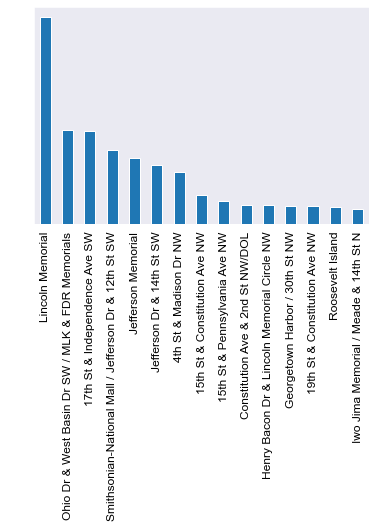

In [423]:
trip_casual_end_station_day = trip_casual_end_station ["start_station_name"].value_counts().head(15).plot(kind="bar")

In [424]:
trip_member_end_station_day

<AxesSubplot:>

In [425]:
trip_casual["duration"].value_counts()

0 days 00:08:34    74
0 days 00:08:21    71
0 days 00:11:28    69
0 days 00:10:51    67
0 days 00:13:03    66
                   ..
0 days 03:59:30     1
0 days 02:44:31     1
0 days 01:30:48     1
0 days 01:26:32     1
0 days 02:43:25     1
Name: duration, Length: 9997, dtype: int64

In [426]:
trip_casual["duration"].mean()

Timedelta('0 days 00:46:19.860385269')

unfortunately not all are coming back to the same starting point (red and orange) 

---------------------------------------------------------------------------------------------------------